<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Titanic - Data Science Project</b></div>

In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette("muted")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

train_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


- Survived: Survival; 0= No, 1= Yes
- Pclass: Ticket class; 1=1st, 2=2nd, 3=3rd
- Sex: Female/Male
- Age: age in years
- SibSp: Number of siblings/spouses aboard the Titanic
- Parch: Number of parents/children aboard the Titanic
- Ticket: Ticket Number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation; C= Cherbourg, Q= Queenstown, S= Southampton

In [3]:
train_df.shape

(891, 12)

In [4]:
test_df.shape

(418, 11)

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
test_df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [11]:
train_df.duplicated().sum()

0

In [12]:
test_df.duplicated().sum()

0

In [13]:
# Checking Cardinality of Categorical Features in  Both Datasets.

print("Cardinality of Categorical Features in Training Data is:")
print(train_df.select_dtypes("object").nunique())
print("\n"+"-"*100)
print("\nCardinality of categorical Featuress in testing Data is:")
print(test_df.select_dtypes("object").nunique())

Cardinality of Categorical Features in Training Data is:
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

----------------------------------------------------------------------------------------------------

Cardinality of categorical Featuress in testing Data is:
Name        418
Sex           2
Ticket      363
Cabin        76
Embarked      3
dtype: int64


In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
# To represent the missing values in percentage to have a clearer picture of the missing data
for column in train_df.columns:
    percent = train_df[column].isnull().mean()
    print(f'{column}:{round(percent*100, 2)}%')

PassengerId:0.0%
Survived:0.0%
Pclass:0.0%
Name:0.0%
Sex:0.0%
Age:19.87%
SibSp:0.0%
Parch:0.0%
Ticket:0.0%
Fare:0.0%
Cabin:77.1%
Embarked:0.22%


In [17]:
for column in test_df.columns:
    percent = test_df[column].isnull().mean()
    print(f'{column}:{round(percent*100, 2)}%')

PassengerId:0.0%
Pclass:0.0%
Name:0.0%
Sex:0.0%
Age:20.57%
SibSp:0.0%
Parch:0.0%
Ticket:0.0%
Fare:0.24%
Cabin:78.23%
Embarked:0.0%


<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Data Exploration</b></div>

#### Visualizing Target Variable - Survived

In [18]:
train_df["Survived"].replace({0:"Not-Survived",1:"Survived"},inplace=True)
Pie = train_df["Survived"].value_counts().to_frame()
Pie


,Survived
Not-Survived,549
Survived,342


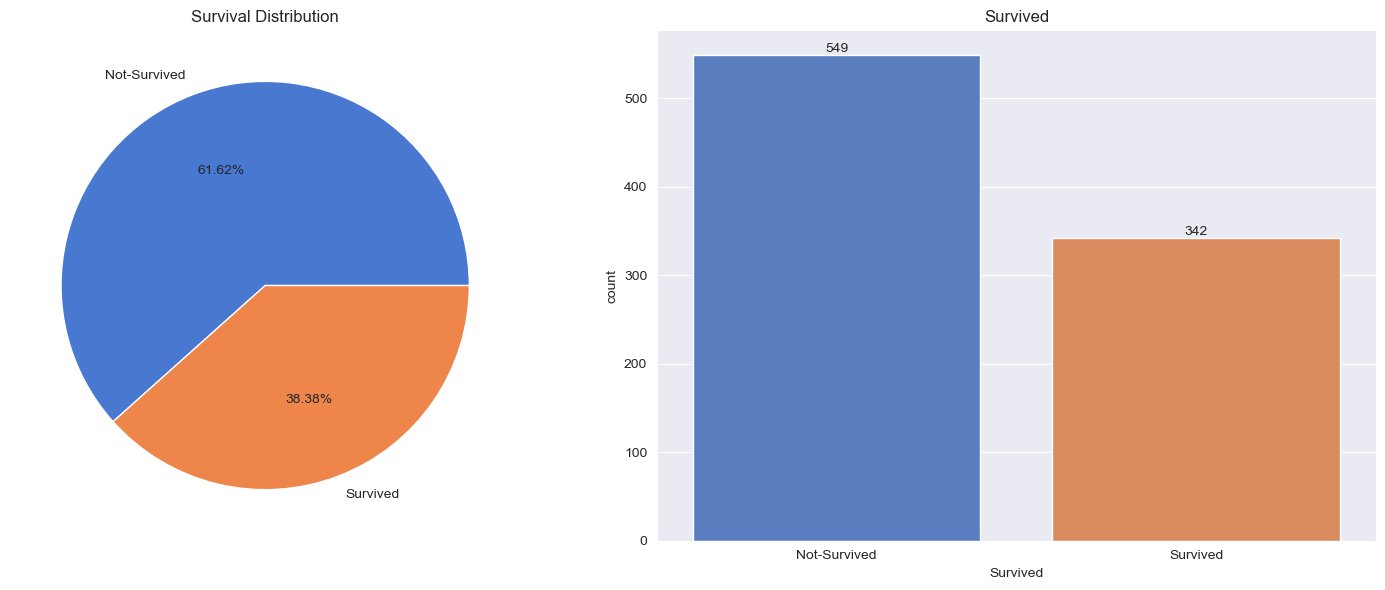

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(Pie.values.ravel(),labels=Pie.index,autopct="%0.2f%%")
plt.title("Survival Distribution")

plt.subplot(1,2,2)
ax = sns.countplot(x="Survived",data=train_df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Survived")
plt.tight_layout()
plt.show()

- Passengers who died are almost twice passengers who survived.

#### Visualizing Feature Variable - Pclass

In [20]:
train_df["Pclass"].replace({1:"First_Class",2:"Middle_Class",3:"Economy"},inplace=True)
test_df["Pclass"].replace({1:"First_Class",2:"Middle_Class",3:"Economy"},inplace=True)
Pie = train_df["Pclass"].value_counts().to_frame()
Pie

,Pclass
Economy,491
First_Class,216
Middle_Class,184


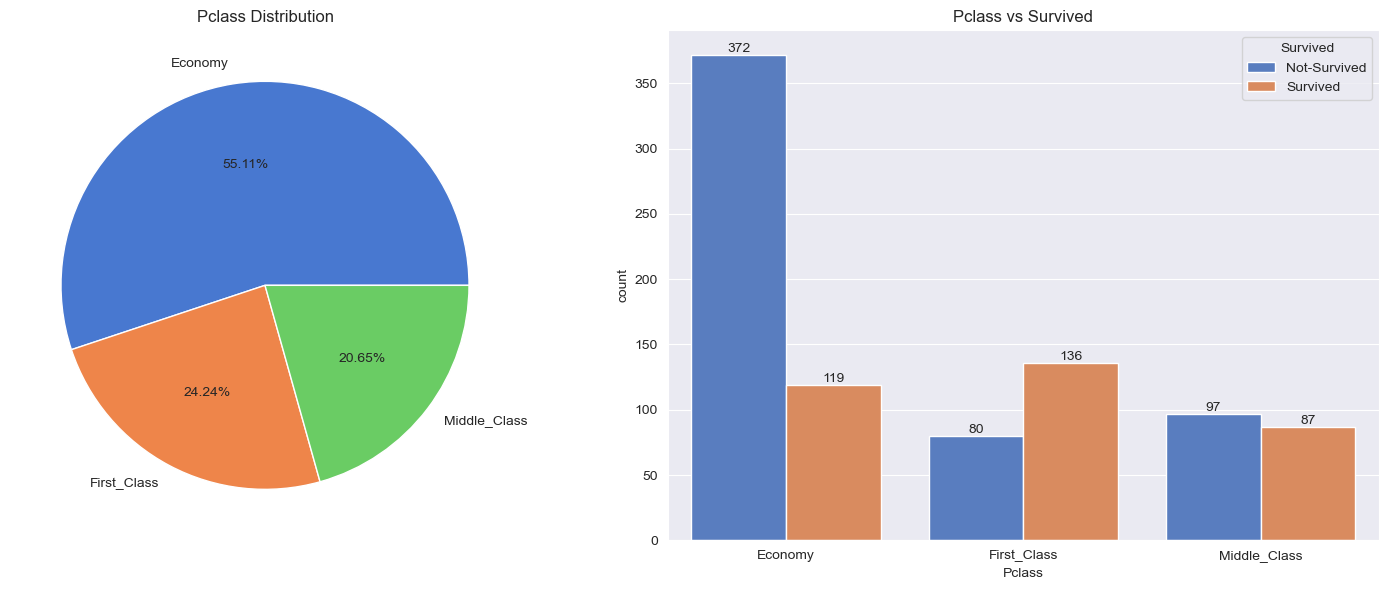

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(Pie.values.ravel(),labels=Pie.index.tolist(),autopct="%0.2f%%")
plt.title("Pclass Distribution")

plt.subplot(1,2,2)
ax = sns.countplot(x="Pclass",hue="Survived",data=train_df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Pclass vs Survived")
plt.tight_layout()
plt.show()

- We can observe that most of the passengers got tickets from the lowest class - Economy
- We can observe from the countplot that:<br>
-* a passenger from Economy has lesser chance of Survival<br>
-* a passenger from Middle Class has almost equal chance of Survival<br>
-* a passenger from First Class has a better chance of Survival

#### Visualizing Feature Variable - Sex

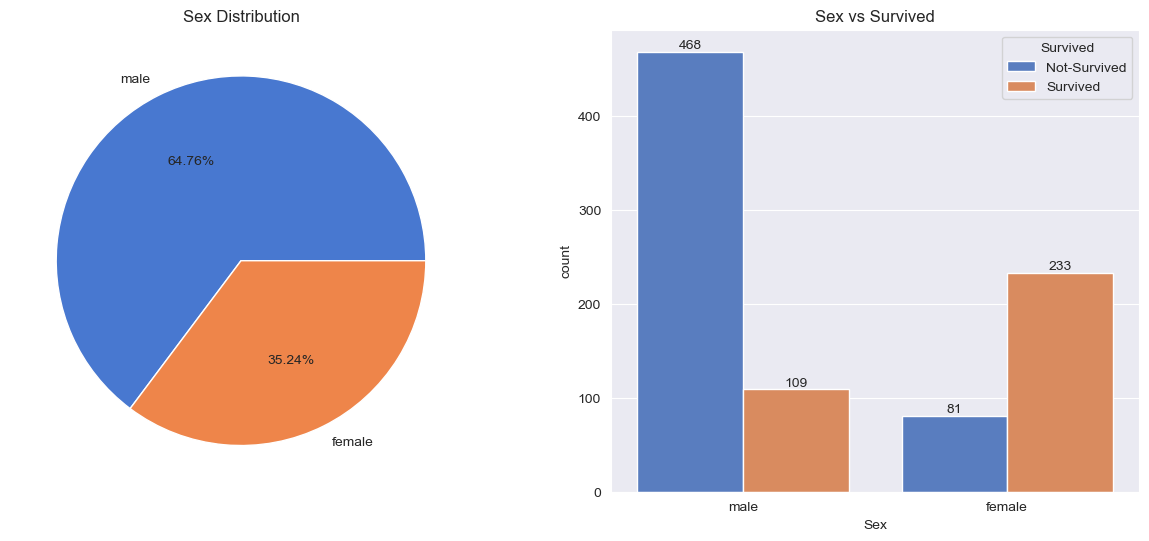

In [22]:
plt.figure(figsize=(15,6))

Pie = train_df["Sex"].value_counts().to_frame()

plt.subplot(1,2,1)
plt.pie(Pie.values.ravel(),labels=Pie.index.tolist(),autopct="%0.2f%%")
plt.title("Sex Distribution")

plt.subplot(1,2,2)
ax = sns.countplot(x='Sex', hue="Survived",data=train_df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Sex vs Survived")
plt.show()

- We can observer that most of the passengers are Male
- We can also observe that:<br>
-* a male passenger has a lesser chance of survival.<br>
-* a female passenger has a better chance of survival.<br>

#### Visualizing Feature Variable - Age

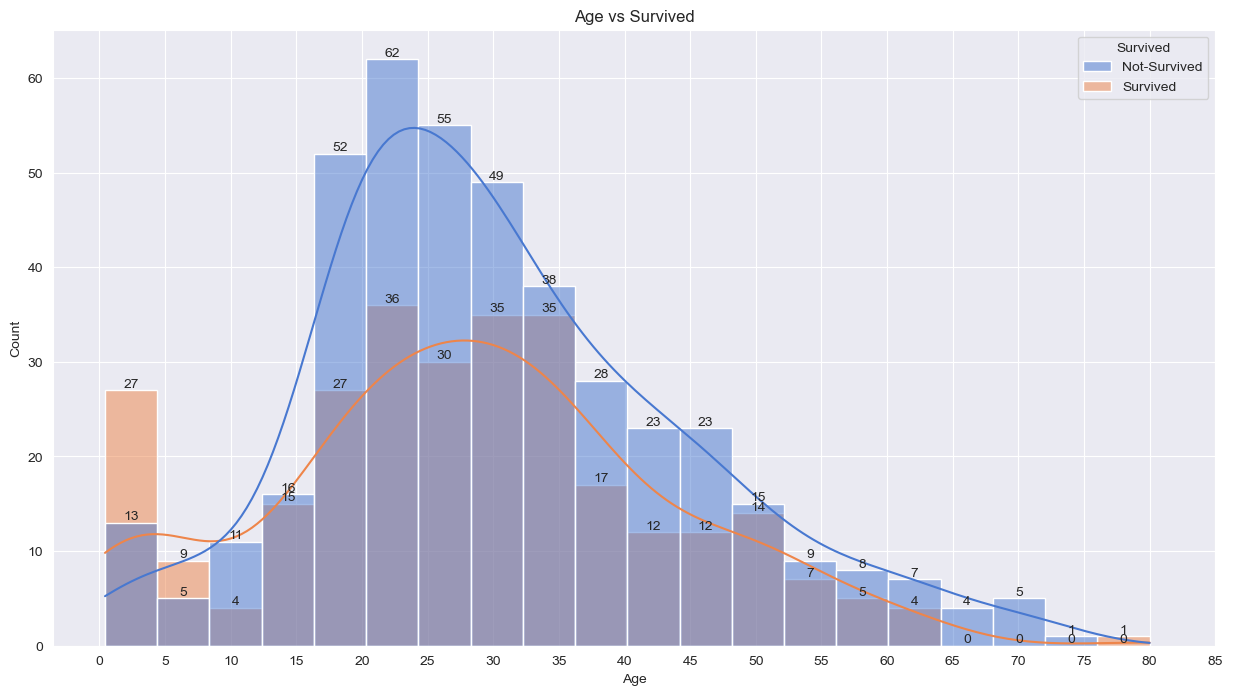

In [41]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x="Age", hue="Survived", data=train_df, kde=True)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Age vs Survived")
plt.xticks(list(range(0,90,5)))
plt.show()

- We can say that most of the passengers were between ages 20-35 years
- We can say that most of the passengers from age 0-10 survived when compared with 11 to 65

#### Visualizing Feature Variable - Sibling/Spouse

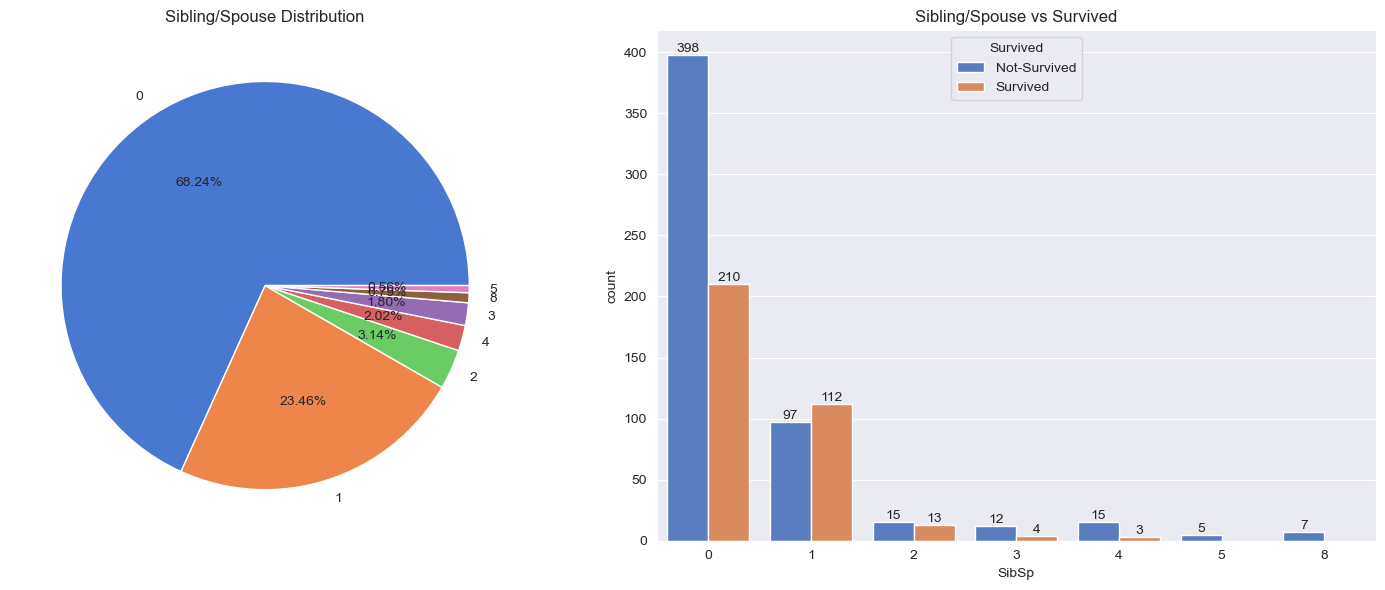

In [42]:
Pie = train_df["SibSp"].value_counts().to_frame()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(Pie["SibSp"],labels=Pie.index.tolist(),autopct="%0.2f%%")
plt.title("Sibling/Spouse Distribution")

plt.subplot(1,2,2)
ax = sns.countplot(x="SibSp",hue="Survived",data=train_df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Sibling/Spouse vs Survived")
plt.tight_layout()
plt.show()

- We can say that most of the passengers are travelling alone
- We can also observe that:<br>
-* Passengers travelling solo and those with 2 Sibling/Spouse have equal chances of survival<br>
-* Passengers with 1 Sibling/Spouse have a better chance of survival.<br>
-* Passengers with 3 or 4 Sibling/Spouse have low chances of survival<br>
-* Passengers with more than 4 Sibling/Spouse have no chance of survival<br>

#### Visualizing Feature Variable - Parent/Child

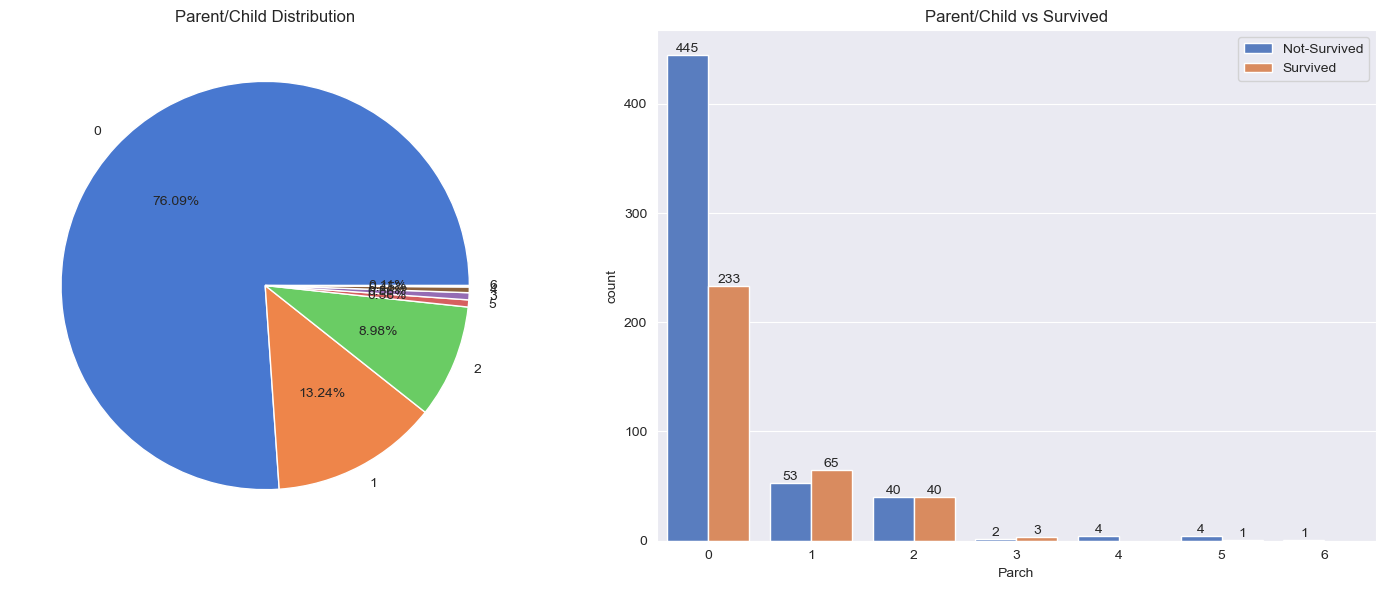

In [43]:
Pie = train_df["Parch"].value_counts().to_frame()
Pie

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(Pie["Parch"],labels=Pie.index.tolist(), autopct="%0.2f%%")
plt.title("Parent/Child Distribution")

plt.subplot(1,2,2)
ax = sns.countplot(x="Parch",hue="Survived",data=train_df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Parent/Child vs Survived")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

- We can observe that 76% of passengers are travelling with no Parent/Child.
- We can also observe that:<br>
-* Passengers with 0 Parent/Child or 2 or 3 Parent/Child have equal chance of survival.<br>
-* Passengers with 1 Parent/Child have a better chance of survival.<br>
-* Passengers with 4 or more Parent/Child have no chance of survival<br>

#### Visualizing Feature Variable - Fare

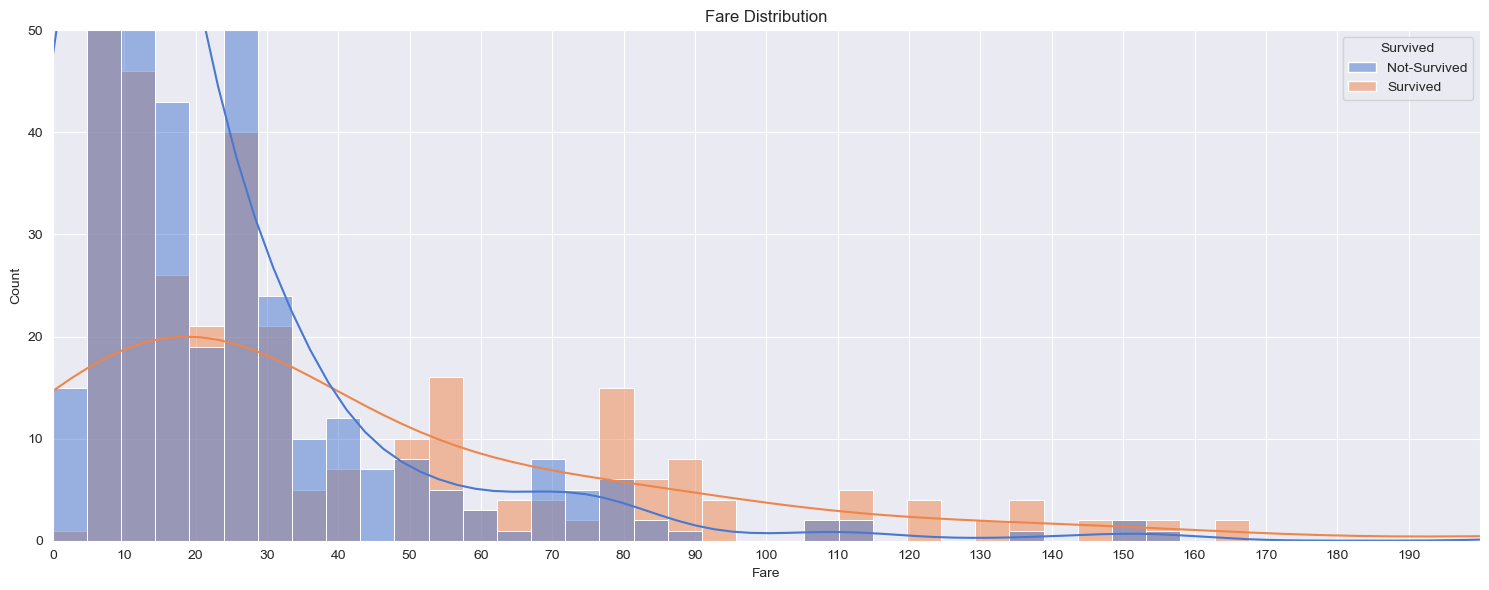

In [45]:
plt.figure(figsize=(15,6))
sns.histplot(x="Fare",hue="Survived",data=train_df,kde=True)
plt.title("Fare Distribution")
plt.ylim(0,50)
plt.xlim(0,200)
plt.xticks(list(range(0,200,10)))
plt.tight_layout()
plt.show()

#### Visualizing Feature Variable - Sex

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [25]:
categorical_features = ['Sex', 'Ticket', 'Embarked']
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

cat_cols = train_df.select_dtypes(include=["object"]).columns.tolist()
cat_cols.remove("Survived")
num_cols = train_df.select_dtypes(include=["int","float"]).columns.tolist()

print("Categorical Columns:",cat_cols)
print("\n","-"*120)
print("\nNumerical Columns:",num_cols)

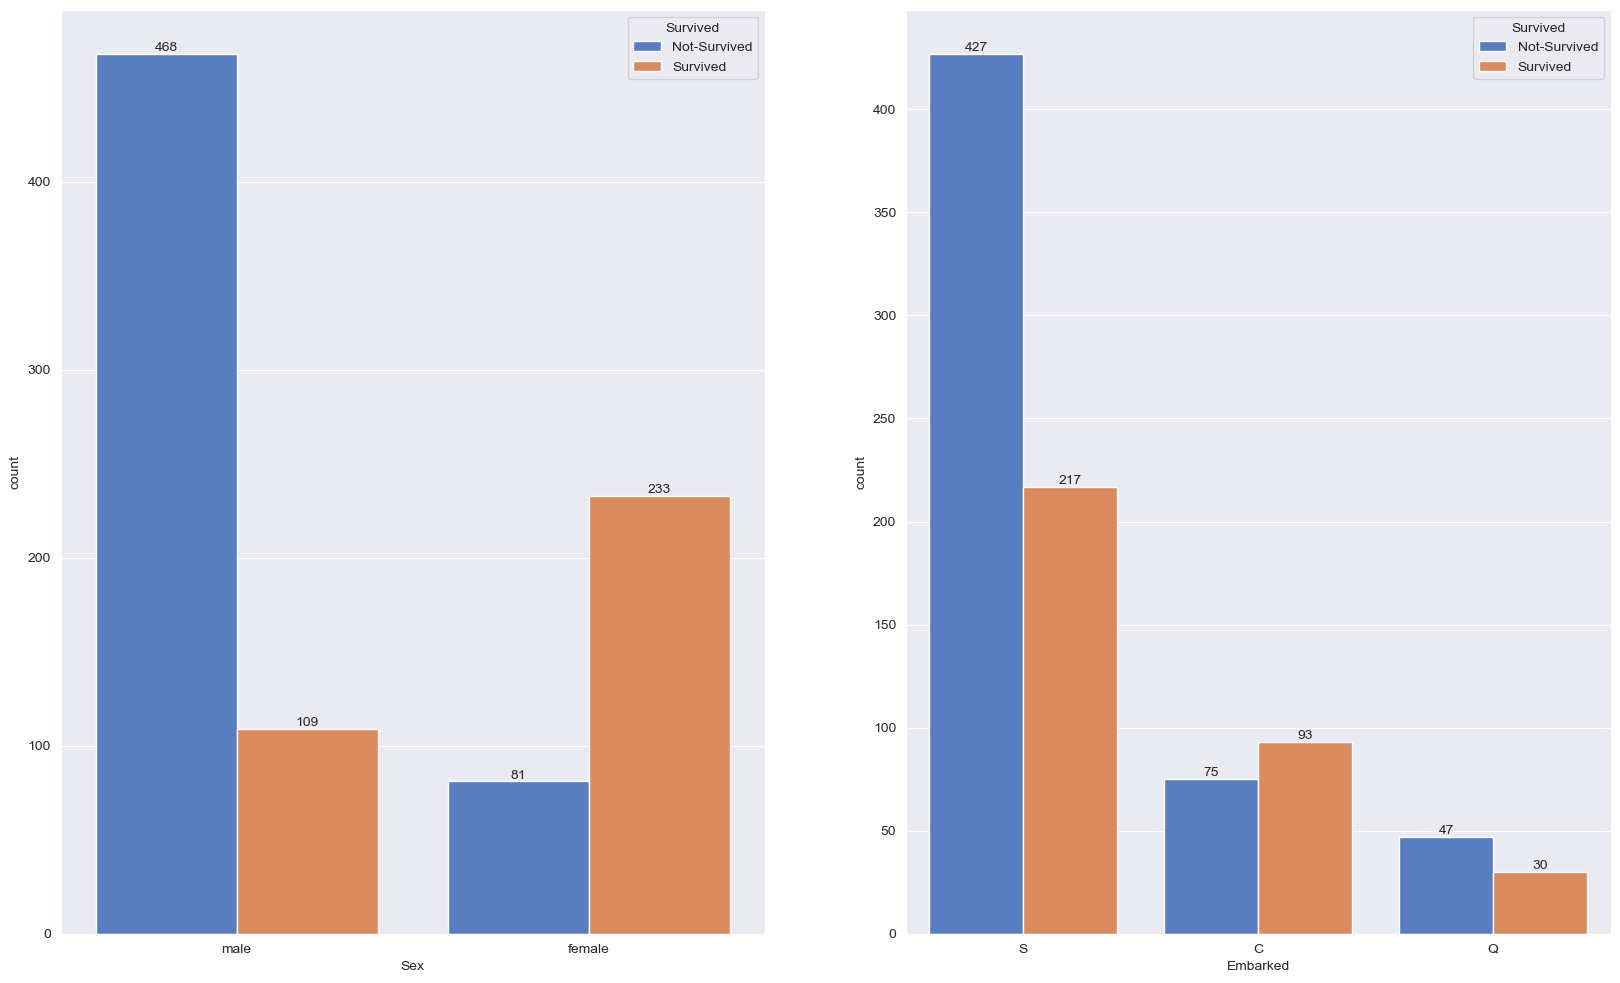

In [26]:
fig = plt.figure(figsize=(20,12))
fig.tight_layout()

cat = ['Sex', 'Embarked']

for i in range(len(cat)):
  col = cat[i]
  sub = fig.add_subplot(1, 2, i + 1)
  ax = sns.countplot(data=train_df, x=col, hue='Survived', palette='muted')
  for container in ax.containers:
    ax.bar_label(container)
plt.show()
  

- Very few of the male passengers survived when compared to the female passengers of which more than 50% of female passengers survived.
- Most of the passengers who died embarked at Southampton, as well as the amount of passengers who survived.

TypeError: Neither the `x` nor `y` variable appears to be numeric.

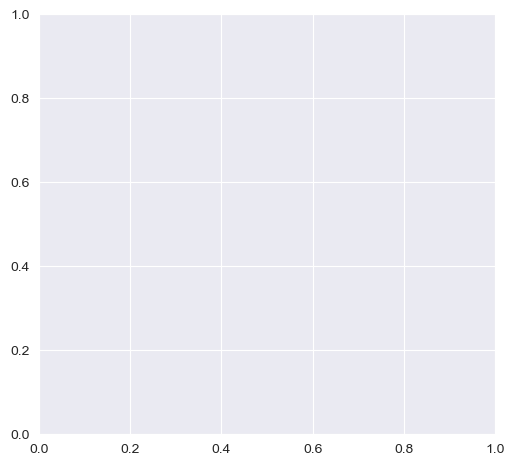

In [27]:
fig = plt.figure(figsize = (20,12))
fig.tight_layout()

for i in range(len(numeric_features)):
  column = numeric_features[i]
  sub = fig.add_subplot(2, 3, i + 1)
  sns.boxplot(x = 'Survived', y = column, data =train_df, palette = 'muted')
  sns.scatterplot(x = 'Survived', y = column, data = train_df, palette = 'muted')
plt.show()

- Most of the passengers with 3rd class tickets did not survive
- Most of the passengers who survived had 1st class tickets

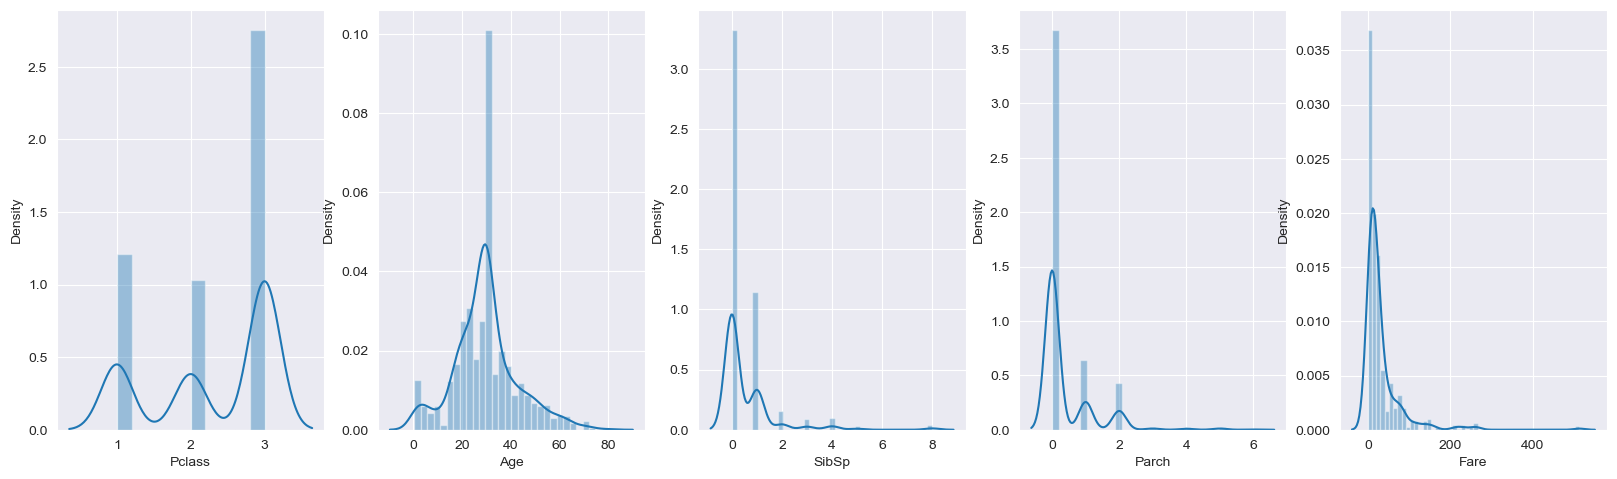

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(2,5,1)
sns.distplot(train_df["Pclass"])

plt.subplot(2,5,2)
sns.distplot(train_df["Age"])

plt.subplot(2,5,3)
sns.distplot(train_df["SibSp"])

plt.subplot(2,5,4)
sns.distplot(train_df["Parch"])

plt.subplot(2,5,5)
sns.distplot(train_df["Fare"])

fig.tight_layout()
plt.show()

- We can see that the numeric data are mostly skewed to the right (positively skewed). Now we need to transform the data to reduce skeweness.